# 基于sklearn的降维和聚类算法

## 线性降维方法：

* FA(Factor Analysis)
* PCA(Principal Component Analysis)
* LDA(Linear Discriminant Analysis)
* FastICA

## 非线性降维方法：
* KernelPCA
* LLE(Locally Linear Embedding)
* t-SNE(t-Distributed Stochastic Neighbor Embedding)

<font color="#ff0000">**这篇只讲降维**</font>
## ~~聚类方法：~~
* ~~K-means~~
* ~~DBSCAN——基于密度的空间聚类算法~~
* ~~OPTICS——基于密度的聚类算法~~
* ~~Spectral Clustering——谱聚类~~
* ~~Hierarchical Clustering——层次聚类~~
* ~~Mean-shift——均值迁移~~

## 本篇总结
1. 多维：t-SNE > LLE > LDA > PCA = KernelPCA = FastICA 
2. 2维：t-SNE > LDA > PCA = KernelPCA > FastICA > LLE

In [83]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler  # 中心化
from sklearn.preprocessing import MinMaxScaler  # 0-1化
from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis, FastICA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering, MeanShift

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [84]:
dx = load_digits()   #读取数字数据，介绍如下
''' 
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
'''
xx = dx.data         #数据
yy = dx.target       #标签
d = 2                #设置需要降到的维数 2,3

len(xx[1])

64

In [85]:
# PCA
%time xxp = PCA(n_components = d).fit_transform(xx)
xxp = MinMaxScaler().fit_transform(xxp)

Wall time: 78 ms


In [86]:
# Kernel PCA
%time xxkp = KernelPCA(n_components = d,kernel = 'rbf', gamma = 0.001).fit_transform(xx)
xxkp = MinMaxScaler().fit_transform(xxkp)

'''
  kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
      Kernel. Default="linear".
  
  gamma : float, default=1/n_features
      Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
      kernels.
'''

Wall time: 256 ms


'\n  kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"\n      Kernel. Default="linear".\n  \n  gamma : float, default=1/n_features\n      Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other\n      kernels.\n'

In [87]:
# FastICA
%time xxi = FastICA(n_components = d).fit_transform(xx)
xxi = MinMaxScaler().fit_transform(xxi)

Wall time: 20 ms


In [88]:
# t-SNE
%time xxt = TSNE(n_components = d).fit_transform(xx)
xxt = MinMaxScaler().fit_transform(xxt)

Wall time: 39.4 s


In [92]:
# LLE
%time xxlle = LocallyLinearEmbedding(n_components = d, n_neighbors = 20).fit_transform(xx)
xxlle = MinMaxScaler().fit_transform(xxlle)

Wall time: 794 ms


In [90]:
# LDA
%time xxl = LinearDiscriminantAnalysis(n_components = d).fit_transform(xx,yy)
xxl = MinMaxScaler().fit_transform(xxl)

Wall time: 11 ms


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [9]:
# FA
%time xxf = FactorAnalysis(n_components = d).fit_transform(xx)
xxf = MinMaxScaler().fit_transform(xxf)

Wall time: 137 ms


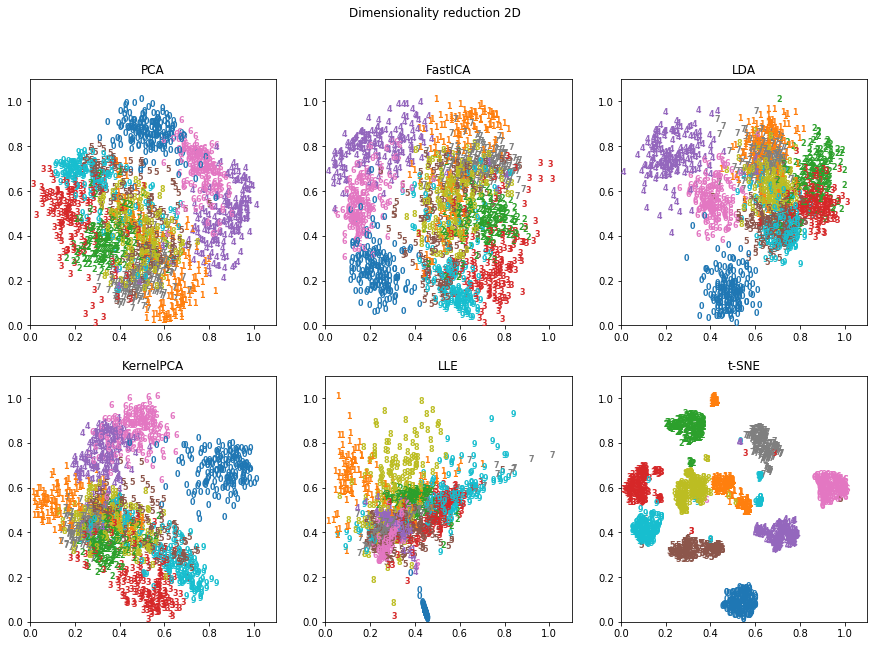

In [93]:
#2-D结果显示#

figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')

for i in range(1797):
    ax1.text(xxp[i,0],xxp[i,1],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
            fontdict = {'weight': 'bold', 'size': 8})
    ax2.text(xxi[i,0],xxi[i,1],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
            fontdict = {'weight': 'bold', 'size': 8})
    ax3.text(xxl[i,0],xxl[i,1],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
            fontdict = {'weight': 'bold', 'size': 8})
    ax4.text(xxkp[i, 0], xxkp[i, 1], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
             fontdict = {'weight': 'bold', 'size': 8})
    ax5.text(xxlle[i, 0], xxlle[i, 1], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
             fontdict = {'weight': 'bold', 'size': 8})
    ax6.text(xxt[i, 0], xxt[i, 1], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
             fontdict = {'weight': 'bold', 'size': 8})


ax1.set_title("PCA")
ax1.set_xlim(xxp.min() * 1.1, xxp.max() * 1.1)
ax1.set_ylim(xxp.min() * 1.1, xxp.max() * 1.1)
ax2.set_title("FastICA")
ax2.set_xlim(xxt.min() * 1.1, xxt.max() * 1.1)
ax2.set_ylim(xxt.min() * 1.1, xxt.max() * 1.1)
ax3.set_title("LDA")
ax3.set_xlim(xxl.min() * 1.1, xxl.max() * 1.1)
ax3.set_ylim(xxl.min() * 1.1, xxl.max() * 1.1)
ax4.set_title("KernelPCA")
ax4.set_xlim(xxi.min() * 1.1, xxi.max() * 1.1)
ax4.set_ylim(xxi.min() * 1.1, xxi.max() * 1.1)
ax5.set_title("LLE")
ax5.set_xlim(xxkp.min() * 1.1, xxkp.max() * 1.1)
ax5.set_ylim(xxkp.min() * 1.1, xxkp.max() * 1.1)
ax6.set_title("t-SNE")
ax6.set_xlim(xxlle.min() * 1.1, xxlle.max() * 1.1)
ax6.set_ylim(xxlle.min() * 1.1, xxlle.max() * 1.1)


figure.suptitle('Dimensionality reduction 2D')
plt.show()

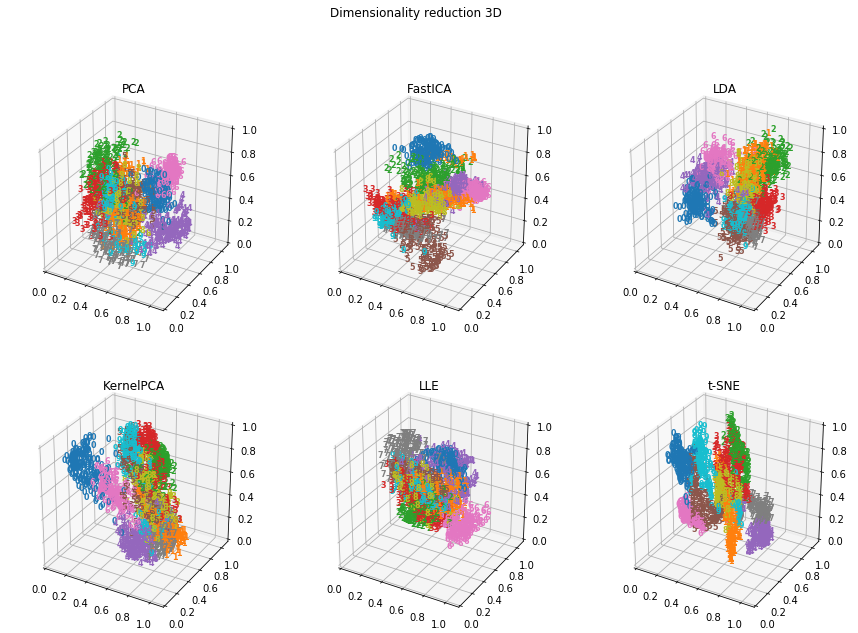

In [82]:
#3-D结果显示#

figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal', projection='3d')
ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal', projection='3d')
ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal', projection='3d')
ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal', projection='3d')
ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal', projection='3d')
ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal', projection='3d')

for i in range(1797):
    ax1.text(xxp[i,0],xxp[i,1],xxp[i, 2],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
            fontdict = {'weight': 'bold', 'size': 8})
    ax2.text(xxi[i,0],xxi[i,1],xxt[i, 2],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
            fontdict = {'weight': 'bold', 'size': 8})
    ax3.text(xxl[i,0],xxl[i,1],xxl[i, 2],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
            fontdict = {'weight': 'bold', 'size': 8})
    ax4.text(xxkp[i, 0], xxkp[i, 1],xxi[i, 2], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
             fontdict = {'weight': 'bold', 'size': 8})
    ax5.text(xxlle[i, 0], xxlle[i, 1],xxkp[i, 2], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
             fontdict = {'weight': 'bold', 'size': 8})
    ax6.text(xxt[i, 0], xxt[i, 1],xxlle[i, 2], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
             fontdict = {'weight': 'bold', 'size': 8})


ax1.set_title("PCA")
ax1.set_xlim(xxp.min() * 1.1, xxp.max() * 1.1)
ax1.set_ylim(xxp.min() * 1.1, xxp.max() * 1.1)
ax2.set_title("FastICA")
ax2.set_xlim(xxt.min() * 1.1, xxt.max() * 1.1)
ax2.set_ylim(xxt.min() * 1.1, xxt.max() * 1.1)
ax3.set_title("LDA")
ax3.set_xlim(xxl.min() * 1.1, xxl.max() * 1.1)
ax3.set_ylim(xxl.min() * 1.1, xxl.max() * 1.1)
ax4.set_title("KernelPCA")
ax4.set_xlim(xxi.min() * 1.1, xxi.max() * 1.1)
ax4.set_ylim(xxi.min() * 1.1, xxi.max() * 1.1)
ax5.set_title("LLE")
ax5.set_xlim(xxkp.min() * 1.1, xxkp.max() * 1.1)
ax5.set_ylim(xxkp.min() * 1.1, xxkp.max() * 1.1)
ax6.set_title("t-SNE")
ax6.set_xlim(xxlle.min() * 1.1, xxlle.max() * 1.1)
ax6.set_ylim(xxlle.min() * 1.1, xxlle.max() * 1.1)


figure.suptitle('Dimensionality reduction 3D')
plt.show()

In [ ]:
help(sklearn.datasets)

In [ ]:
xxp.shape